In [2]:
!pip install -U scikit-learn

     |████████████████████████████████| 22.2 MB 63 kB/s  eta 0:00:01
     |████████████████████████████████| 303 kB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 94 kB/s  eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [12]:
!pip install -U matplotlib

     |████████████████████████████████| 11.5 MB 397 kB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 2.5 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [13]:
import pandas as pd
import numpy as np
import os
import time
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from IPython.display import clear_output

In [5]:
root = '/home/MIBS/facenet'
target_folder = os.path.join(root, 'embedding', 'similarity')

## Read data

In [6]:
df_sim = pd.read_csv(os.path.join(target_folder, 'similarity_sample.csv'), index_col=0)
df_sim.head()

,1000046113_190517.jpg,1000046113_190542.jpg,1000046113_190396.jpg,1000046113_190227.jpg,1000046113_190351.jpg,1000046113_190136.jpg,1000046113_190150.jpg,1000046113_190142.jpg,1000046113_190162.jpg,1000046113_190247.jpg,...,9738015_377684.jpg,9738015_8590.jpg,9738015_8606.jpg,9738015_15019.jpg,9738015_15000.jpg,9738015_8424.jpg,9738015_8564.jpg,9738015_377756.jpg,9738015_8391.jpg,9738015_15206.jpg
1000046113_190517.jpg,0.000000,0.143982,0.214107,0.179404,0.064594,0.087816,0.107404,0.095076,0.097124,0.106982,...,0.860575,0.747911,0.727228,0.693272,0.712363,0.638291,0.857498,0.823187,0.698919,0.717771
1000046113_190542.jpg,0.143982,0.000000,0.208397,0.260087,0.198990,0.142480,0.217972,0.214152,0.145049,0.208114,...,0.732235,0.679044,0.674223,0.688527,0.710484,0.613962,0.707826,0.751459,0.673050,0.685658
1000046113_190396.jpg,0.214107,0.208397,0.000000,0.489893,0.286222,0.245889,0.352176,0.344287,0.116870,0.384114,...,0.860128,0.794732,0.818045,0.763146,0.787256,0.661241,0.850341,0.886226,0.760610,0.763944
1000046113_190227.jpg,0.179404,0.260087,0.489893,0.000000,0.186223,0.178787,0.125818,0.164370,0.284938,0.074724,...,0.738296,0.677773,0.701092,0.663584,0.645251,0.639914,0.772008,0.688442,0.657168,0.640283
1000046113_190351.jpg,0.064594,0.198990,0.286222,0.186223,0.000000,0.125612,0.157908,0.159176,0.148402,0.151560,...,0.892191,0.754673,0.736680,0.745465,0.755129,0.654258,0.917065,0.808106,0.722302,0.758688


In [7]:
df_sim

,1000046113_190517.jpg,1000046113_190542.jpg,1000046113_190396.jpg,1000046113_190227.jpg,1000046113_190351.jpg,1000046113_190136.jpg,1000046113_190150.jpg,1000046113_190142.jpg,1000046113_190162.jpg,1000046113_190247.jpg,...,9738015_377684.jpg,9738015_8590.jpg,9738015_8606.jpg,9738015_15019.jpg,9738015_15000.jpg,9738015_8424.jpg,9738015_8564.jpg,9738015_377756.jpg,9738015_8391.jpg,9738015_15206.jpg
1000046113_190517.jpg,0.000000,0.143982,0.214107,0.179404,0.064594,0.087816,0.107404,0.095076,0.097124,0.106982,...,0.860575,0.747911,0.727228,0.693272,0.712363,0.638291,0.857498,0.823187,0.698919,0.717771
1000046113_190542.jpg,0.143982,0.000000,0.208397,0.260087,0.198990,0.142480,0.217972,0.214152,0.145049,0.208114,...,0.732235,0.679044,0.674223,0.688527,0.710484,0.613962,0.707826,0.751459,0.673050,0.685658
1000046113_190396.jpg,0.214107,0.208397,0.000000,0.489893,0.286222,0.245889,0.352176,0.344287,0.116870,0.384114,...,0.860128,0.794732,0.818045,0.763146,0.787256,0.661241,0.850341,0.886226,0.760610,0.763944
1000046113_190227.jpg,0.179404,0.260087,0.489893,0.000000,0.186223,0.178787,0.125818,0.164370,0.284938,0.074724,...,0.738296,0.677773,0.701092,0.663584,0.645251,0.639914,0.772008,0.688442,0.657168,0.640283
1000046113_190351.jpg,0.064594,0.198990,0.286222,0.186223,0.000000,0.125612,0.157908,0.159176,0.148402,0.151560,...,0.892191,0.754673,0.736680,0.745465,0.755129,0.654258,0.917065,0.808106,0.722302,0.758688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9738015_8424.jpg,0.638291,0.613962,0.661241,0.639914,0.654258,0.565774,0.627170,0.617883,0.591943,0.570516,...,0.349841,0.339943,0.178568,0.393416,0.368407,0.000000,0.225626,0.389076,0.216939,0.363033
9738015_8564.jpg,0.857498,0.707826,0.850341,0.772008,0.917065,0.767121,0.829019,0.811188,0.788292,0.787758,...,0.379458,0.421981,0.283137,0.476879,0.462412,0.225626,0.000000,0.429955,0.386696,0.446090
9738015_377756.jpg,0.823187,0.751459,0.886226,0.688442,0.808106,0.770393,0.795371,0.792688,0.748108,0.685805,...,0.166385,0.407123,0.291589,0.203697,0.200067,0.389076,0.429955,0.000000,0.301958,0.191935
9738015_8391.jpg,0.698919,0.673050,0.760610,0.657168,0.722302,0.562059,0.612923,0.629705,0.633727,0.608942,...,0.332124,0.123822,0.168079,0.270137,0.186813,0.216939,0.386696,0.301958,-0.000000,0.208213


In [30]:
labels = []
probs = []

for column, data_column in df_sim.items():
    idx_1 = column.split('.')[0].split('_')[0]
    for row, value in data_column.items():
        idx_2 = row.split('.')[0].split('_')[0]
        probs.append(value)
        if idx_1 == idx_2:
            # same person
            labels.append(0.)
        else:
            # different person
            labels.append(1.)

## ROC

In [31]:
fpr, tpr, threshold = roc_curve(np.array(labels), np.array(probs))

In [32]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1 - fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold = {}, G-Mean = {}'.format(round(threshold[ix], 3), round(gmeans[ix], 3)))

Best Threshold = 0.518, G-Mean = 0.965


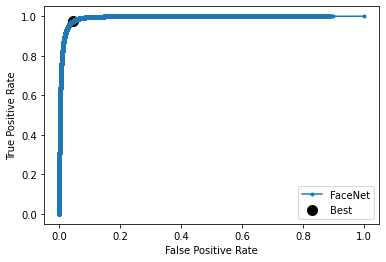

In [33]:
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='FaceNet')
plt.scatter(fpr[ix], tpr[ix], marker='o', s=100, color='black', label='Best')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Precision Recall

In [34]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [35]:
precision, recall, threshold = precision_recall_curve(np.array(labels), np.array(probs))

In [37]:
# f1 = f1_score(np.array(labels), np.array(probs))
# ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [38]:
auc_ = auc(recall, precision)

In [39]:
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold = {}, F-Score = {}'.format(round(threshold[ix], 3), round(fscore[ix], 3)))

Best Threshold = 0.28, F-Score = 1.0


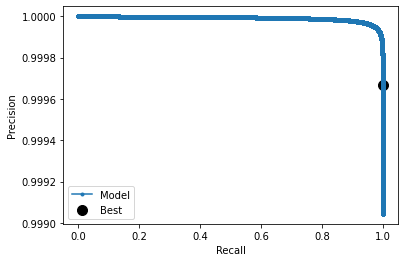

In [40]:
plt.plot(recall, precision, marker='.', label='Model')
plt.scatter(recall[ix], precision[ix], marker='o', s=100, color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()